<a href="https://colab.research.google.com/github/akashjborah97/Crypto-NER/blob/main/CryptoNER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
!pip install tensorflow
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Importing Data

In [116]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Crypto NER/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44136 entries, 0 to 44135
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       44136 non-null  int64 
 1   content  43486 non-null  object
dtypes: int64(1), object(1)
memory usage: 689.8+ KB


In [117]:
data.head()

,id,content
0,321712,Hey 👋 \n\nWe re using our bot:\n\nhttps://t.me...
1,321713,Good stuff \n\nI am surprised I took so long t...
2,321717,you are using a non-official one
3,321718,use the one that uniswap uses: https://thegrap...
4,321719,keep in mind this is a hot subgraph so it can ...


In [118]:
data.dropna(axis=0,inplace=True)  #dropping na
data.drop_duplicates(subset=['content'],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42659 entries, 0 to 44135
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       42659 non-null  int64 
 1   content  42659 non-null  object
dtypes: int64(1), object(1)
memory usage: 999.8+ KB


In [119]:
term_abb=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Crypto NER/term_abb.csv')
term_abb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   terms          78 non-null     object
 1   abbreviations  78 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


In [120]:
term_abb.head()

,terms,abbreviations
0,Auroracoin,AUR
1,BitConnect (inactive),BCC
2,Bitcoin Cash,BCH
3,Bitcoin,BTCorXBT
4,Dash,DASH


In [121]:
term_def=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Crypto NER/term_def.csv')
term_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   terms        160 non-null    object
 1   definition1  160 non-null    object
 2   definition2  14 non-null     object
dtypes: object(3)
memory usage: 3.9+ KB


In [122]:
term_def.head()

,terms,definition1,definition2
0,51% attack,A hypothetical situation where more than half ...,NaN
1,51% attack protection,A protection mechanism implemented by several ...,NaN
2,AFK,Away From Keyboard; used on social media platf...,NaN
3,Airdrop,An event where a blockchain project distribute...,NaN
4,Altcoin,Any cryptocurrency that is an alternative to B...,NaN


In [123]:
def get_data(data):
  data = data["content"].tolist()
  return data  

In [124]:
data1=get_data(data)
data1[0]

'Hey 👋 \n\nWe re using our bot:\n\nhttps://t.me/lobster_watcher\n\nAnd also filtering such recommendations to select only topics worth attention.\n\n~5 people are in duty every day.'

#Cleaning data

##1. Lower Case

In [125]:
def lower_case(x):
    x = x.lower()
    return x


def lower_tweets(data):
  for i in range(len(data)):
    data[i]=lower_case(data[i])
  return data

In [126]:
lower_data=lower_tweets(data1)
lower_data[0]

'hey 👋 \n\nwe re using our bot:\n\nhttps://t.me/lobster_watcher\n\nand also filtering such recommendations to select only topics worth attention.\n\n~5 people are in duty every day.'

##2. Removing Unicode Characters

In [127]:
import re
def remove_unicode_haracters(text):
  text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
  return text


def rmv_unic(data):
  for i in range(len(data)):
    data[i]=remove_unicode_haracters(data[i])
  return data

In [128]:
rmv_unic_data=rmv_unic(lower_data)
rmv_unic_data[0]

'hey  we re using our botand also filtering such recommendations to select only topics worth attention5 people are in duty every day'

##3. Removing Stopwords

In [129]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [130]:
def remove_stopwords(text):
  stop = stopwords.words('english')
  text = " ".join([word for word in text.split() if word not in (stop)])
  return text

def rmv_stopwords(data):
  for i in range(len(data)):
    data[i]=remove_stopwords(data[i])
  return data

In [131]:
new_data = rmv_stopwords(rmv_unic_data)
new_data[0]

'hey using botand also filtering recommendations select topics worth attention5 people duty every day'

##4. Removing Contracting

In [132]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [133]:
def text_cleaner(text):
    newString = text.lower()
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    newString = re.sub('[m]{2,}', 'mm', newString)
    tokens=newString.split()
    long_words=[]
    for i in tokens:
        if len(i)>1:                                                 #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

In [134]:
#call the function
cleaned_text = []
for t in new_data:
    cleaned_text.append(text_cleaner(t)) 

In [135]:
cleaned_text[0]

'hey using botand also filtering recommendations select topics worth attention people duty every day'

##Understanding the distribution of the sequences

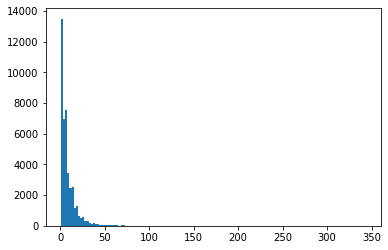

In [136]:
lenghts=[len(t.split(' '))for t in cleaned_text]
plt.hist(lenghts,bins=len(set(lenghts)))
plt.show()

In [137]:
def empty_list_remove(input_list):
    new_list = []
    for ele in input_list:
            new_list.append(ele)
    return new_list

In [138]:
cleaned_texts=empty_list_remove(cleaned_text)

In [142]:
cleaned_texts[1], len(cleaned_texts)

('good stuff surprised took long find community lol', 42659)

In [141]:
df = pd.DataFrame(cleaned_text,columns =['cleaned_text'])
df.drop_duplicates(subset=['cleaned_text'],inplace=True)
df.dropna(axis=0,inplace=True)#dropping na
df.head(15)

,cleaned_text
0,hey using botand also filtering recommendation...
1,good stuff surprised took long find community lol
2,using nonofficial one
3,use one uniswap uses
4,keep mind hot subgraph change anytime without ...
5,
6,voting money beyond dumb fact someone money do...
8,adjusting gov model
9,voting often delegating people know shit
10,quadratic voting solves needs somehow verify i...


#Extracting noun phrases

In [33]:
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk import RegexpParser
from nltk import Tree
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [34]:
def get_noun_phrases(text):
    pos = pos_tag(word_tokenize(text))
    count = 0
    half_chunk = ""
    for word, tag in pos:
        if re.match(r"NN.*", tag):
            count+=1
            if count>=1:
                half_chunk = half_chunk + word + " "
        else:
            half_chunk = half_chunk+"---"
            count = 0
    half_chunk = re.sub(r"-+","?",half_chunk).split("?")
    half_chunk = [x.strip() for x in half_chunk if x!=""]
    return half_chunk

In [35]:
get_noun_phrases(cleaned_text[4])

['mind', 'subgraph change', 'notice']

In [36]:
cleaned_text[:7]

['hey using botand also filtering recommendations select topics worth attention people duty every day',
 'good stuff surprised took long find community lol',
 'using nonofficial one',
 'use one uniswap uses',
 'keep mind hot subgraph change anytime without notice',
 '',
 'voting money beyond dumb fact someone money doesnt mean better judgement contrary point probably checked busy chilling']

In [37]:
def nouns(data):
  for i in range(len(data)):
    data[i]=get_noun_phrases(data[i])
  return data

In [38]:
nouns=nouns(cleaned_text)

In [39]:
nouns[4],nouns[22244]

(['mind', 'subgraph change', 'notice'],
 ['rai',
  'float',
  'sort',
  'ohm',
  'towards',
  'crypto',
  'liquidity people',
  'mean',
  'thats',
  'use case',
  'change mentality werent',
  'rai',
  'isnt',
  'fine'])

In [40]:
type(nouns)

list

In [41]:
nouns[2]

[]

In [42]:
def empty_list_remove(input_list):
    new_list = []
    for ele in input_list:
        if ele:
            new_list.append(ele)
    return new_list

In [43]:
new_nouns=empty_list_remove(nouns)        #new_nouns contain all the nouns from the dataset as list

In [100]:
#print(new_nouns[0])

In [45]:
new_nouns[6544]

['trade commodities']

In [46]:
len(new_nouns)

38108

#Generating a corpus of Crypto related terms

In [47]:
term_abb.head(10)

,terms,abbreviations
0,Auroracoin,AUR
1,BitConnect (inactive),BCC
2,Bitcoin Cash,BCH
3,Bitcoin,BTCorXBT
4,Dash,DASH
5,Dogecoin,DOGEorXDG
6,EOS.IO,EOS
7,Ethereum Classic,ETC
8,Ether (also known as Ethereum),ETH
9,Gridcoin,GRC


In [48]:
term_def.head()

,terms,definition1,definition2
0,51% attack,A hypothetical situation where more than half ...,NaN
1,51% attack protection,A protection mechanism implemented by several ...,NaN
2,AFK,Away From Keyboard; used on social media platf...,NaN
3,Airdrop,An event where a blockchain project distribute...,NaN
4,Altcoin,Any cryptocurrency that is an alternative to B...,NaN


In [49]:
term1=term_abb["terms"].tolist()
term2=term_def["terms"].tolist()
term3=term_abb["abbreviations"].tolist()
term1[1], term2[1], term3[1]

('BitConnect (inactive)', '51% attack protection', 'BCC')

In [50]:
terms=term1+term2+term3
terms[23],terms[79],terms[250]

('NEM', '51% attack protection', 'MZC')

In [51]:
new_terms=lower_tweets(terms)
new_terms[23]
#new_terms is the vocabulary of crypto related words

'nem'

In [52]:
new_terms[3:7]

['bitcoin', 'dash', 'dogecoin', 'eos.io']

##Checking if the nouns are crypto realted or not
##Specifying the labels

In [53]:
def check_list(t,data):
  lst=[]
  # count=0
  for each in data:
    for all in t:
      if all in each:
        # count += 1
        lst.append(1)
      else:
        lst.append(0)
  return lst

In [54]:
cklst=check_list(new_terms,new_nouns)

In [55]:
classes=set(cklst)      #labels
print(classes)

{0, 1}


###First occurance of matching term




In [56]:
cklst.index(1)

6544

In [57]:
cklst[6544]

1

###Dataframe with labels 0(no crypto related terms) and 1(crypto related terms present)

In [152]:
df3=pd.DataFrame(zip(new_nouns), columns=['Nouns in message'])     #primary dataframe
df4=pd.DataFrame(cklst, columns=['Labels'])
result1 = pd.concat([df3, df4], axis=1, join="inner")

In [153]:
result1.head(10)

,Nouns in message,Labels
0,"[hey, botand, recommendations, topics, attenti...",0
1,"[stuff, find community lol]",0
2,[uniswap],0
3,"[mind, subgraph change, notice]",0
4,"[money, fact someone money doesnt, judgement, ...",0
5,[gov model],0
6,[people],0
7,"[voting solves, verify identity holder]",0
8,[hope],0
9,[guys],0


In [154]:
result1.Labels.unique()

array([0, 1])

#Checking similarity of nouns in the sentences with corpus of crypto related terms using BERT

In [61]:
pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.4 MB/s 
     |████████████████████████████████| 4.7 MB 26.1 MB/s 
     |████████████████████████████████| 1.3 MB 45.8 MB/s 
     |████████████████████████████████| 120 kB 40.8 MB/s 
     |████████████████████████████████| 6.6 MB 42.4 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=6c5051a044b495b7483d9c6e86a60c5000f853191912aa2fd1f2ae5d783b7023
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


##1. Initilizing the model

In [62]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

##2. Encode the sentences:

In [63]:
# print(new_nouns[6544])

In [64]:
# sentences= new_nouns[6544]    #['auroracoin','good']

In [65]:
# sentence_embeddings = model.encode(sentences)

In [66]:
# sentence_embeddings.shape

In [67]:
# sentence_embeddings

In [68]:
def sem(x):
  matrix=[]
  for i in range(len(x)):
    en=model.encode(x[i])
    # print(en)
    matrix.append(en)
  return matrix

In [69]:
sentence_embeddings_matrix=sem(new_nouns)     #list holding noun embedding for the sentences

In [70]:
print(sentence_embeddings_matrix[0])

[[ 0.3460113  -0.05862967  2.3071382  ...  0.23011853  0.06801054
   0.28735486]
 [ 0.24728116 -0.47802404  2.1150992  ... -0.02662076 -0.00948082
   0.35242113]
 [-0.31998995 -0.12653925  2.559552   ... -0.408977   -0.7333975
   0.16143204]
 [ 0.00286178 -0.770236    1.986948   ...  0.02800232 -0.21661676
   0.0299639 ]
 [ 0.6752293  -0.69553185  2.1722457  ...  0.201197   -0.83573145
  -0.20945543]
 [ 0.00727411 -0.40555212  2.3804216  ... -0.29693     0.64414483
  -0.44650117]]


In [71]:
type(sentence_embeddings_matrix), len(sentence_embeddings_matrix)

(list, 38108)

##3. Encode the crypto terms:

In [72]:
crypto_terms=new_terms

In [73]:
print(crypto_terms)

['auroracoin', 'bitconnect (inactive)', 'bitcoin cash', 'bitcoin', 'dash', 'dogecoin', 'eos.io', 'ethereum classic', 'ether (also known as ethereum)', 'gridcoin', 'litecoin', 'coinye (inactive)', 'mazacoin', 'nano', 'neo', 'namecoin', 'nxt', 'potcoin', 'peercoin', 'titcoin', 'usd coin (stablecoin)', 'tether', 'vertcoin', 'nem', 'stellar', 'monero', 'primecoin', 'ripple', 'verge', 'zcash', 'bitcoin improvement proposal', 'automatic teller machine for bitcoin', 'enterprise ethereum alliance', 'ethereum improvement proposal', 'fundamental analysis', 'moving average convergence divergence', 'proof of burn', 'proof of developer', 'technical analysis or trend analysis', 'coordinated universal time', 'year to date', 'address', 'application programming interface', 'brute force attack', 'bitcoin address format (also known as bc1 addresses)', 'developers conference', 'multi-signature', 'secure hash acronym (256-bit)', 'worldwide developers conference', 'anti-money laundering', 'all-time high', '

In [74]:
terms_embeddings = model.encode(crypto_terms)

In [75]:
terms_embeddings.shape, type(terms_embeddings)

((316, 768), numpy.ndarray)

In [76]:
terms_embeddings

array([[-7.52210736e-01, -6.39778733e-01,  1.43692005e+00, ...,
        -7.80766249e-01, -4.08506505e-02,  4.47646707e-01],
       [-4.53243628e-02,  4.57669608e-03,  1.44910157e+00, ...,
        -1.60562492e-03, -3.24456394e-01, -8.74181464e-02],
       [-4.76613909e-01, -4.33733791e-01,  1.21435285e-01, ...,
         1.21386439e-01, -6.87229812e-01,  3.41541857e-01],
       ...,
       [ 4.10369039e-02, -3.23784620e-01,  2.22955990e+00, ...,
        -1.25121504e-01, -7.56826922e-02,  7.67162219e-02],
       [-9.00003836e-02, -2.63913155e-01,  2.27775860e+00, ...,
        -4.70513910e-01, -1.11896835e-01,  8.62472653e-02],
       [ 2.46986911e-01,  2.60117594e-02,  2.29969811e+00, ...,
         4.43342358e-01,  5.49255431e-01,  6.84937060e-01]], dtype=float32)

##4. Checking similarity

In [77]:
from sklearn.metrics.pairwise import cosine_distances

In [79]:
# CD=cosine_distances(
#     [sentence_embeddings[1]],
#     terms_embeddings[0:]
# )
# CD

In [80]:
# type(CD)

###Function to find cosine distance between nouns in the sentences and corpus of crypto related terms

In [81]:
def cosine_dist(x,y):
  dist_matrix=[]
  for i in range(len(x)):
    cd = cosine_distances(x[i],y[0:])
    dist_matrix.append(cd)  
  return dist_matrix


In [82]:
x=cosine_dist(sentence_embeddings_matrix,terms_embeddings)

In [84]:
len(x)

38108

In [85]:
def myMax(list1):

    max = list1[0]
    for x in list1:
        if x > max:
            max = x
    return max

In [86]:
def similarity(x):
  r=[]
  for all in x:
    for i in all:
      #print(i)
      r.append(myMax(i))
      break
  return r

In [143]:
similarity_values=similarity(x)      #similarity values of nouns in sentences with the corpus of word

In [144]:
len(similarity_values)

38108

In [145]:
max(similarity_values), min(similarity_values)          #maximum similarity and minimum similarity

(1.055799, 0.6684458)

In [155]:
df3['Similarity']=similarity_values

In [156]:
df3.head(10)

,Nouns in message,Similarity
0,"[hey, botand, recommendations, topics, attenti...",0.892123
1,"[stuff, find community lol]",0.880820
2,[uniswap],0.775288
3,"[mind, subgraph change, notice]",0.931696
4,"[money, fact someone money doesnt, judgement, ...",0.808403
5,[gov model],0.775231
6,[people],0.934089
7,"[voting solves, verify identity holder]",0.836770
8,[hope],0.908201
9,[guys],0.843970


In [157]:
threshold=1.0

In [158]:
def crypto_related(x):
  new_lst=[]
  for i in range(len(x)):
    if x[i]> threshold:
      new_lst.append("True")
    else:
      new_lst.append("False")
  return new_lst

In [159]:
Crypto_related=crypto_related(similarity_values)

In [160]:
len(Crypto_related)

38108

In [161]:
df3['Crypto_related']=Crypto_related
df3.head()

,Nouns in message,Similarity,Crypto_related
0,"[hey, botand, recommendations, topics, attenti...",0.892123,False
1,"[stuff, find community lol]",0.880820,False
2,[uniswap],0.775288,False
3,"[mind, subgraph change, notice]",0.931696,False
4,"[money, fact someone money doesnt, judgement, ...",0.808403,False


In [162]:
df3.Crypto_related.unique()

array(['False', 'True'], dtype=object)